In [ ]:
import pandas as pd
import numpy as np

#dataset2 (excel dataset)
data_path = 'Covid Data.csv'
dataframe = pd.read_csv(data_path)



#what is in or kept in dataframe. we're excluding ICU(sometimes), PATIENT_TYPE, INTUBED, PREGNANT, USMR, OTHER_DISEASE, CLASSIFICATION_FINAL, and MEDICAL_UNIT for now, changing dates of death to 1 for yes and 2 no and excluding rows with missing data 97 or 99
dataframe = dataframe[['RENAL_CHRONIC','DATE_DIED', 'SEX', 'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'TOBACCO']]

#If died = 1, if they didnt die = 0
dataframe['DATE_DIED'].replace({'9999-99-99': 0}, inplace = True)
dataframe['DATE_DIED'].replace( {'[^0-9]': 1}, regex = True, inplace = True)

#removing  original unknown values 97, 99 and 98
dataframe.replace({97:np.nan}, inplace = True)
dataframe.replace({98:np.nan}, inplace = True)
dataframe.replace({99:np.nan}, inplace = True)

#renaming Date_Died
dataframe.rename(columns = {'DATE_DIED':'Death'}, inplace = True)

#removing Death and age, and creating separate dataset for them
dataframe1 = dataframe[['Death','AGE']]
dataframe2 = dataframe.drop(['Death', 'AGE'], axis=1)


#fixing yes or no data: yes = 1 and no = 0, for SEX = 0 means male (originally was 2 for male)
dataframe2.replace({2:0}, inplace = True)
#datasets stacked side by side
dataframe = pd.concat([dataframe1,dataframe2], axis=1)
dataframe.head()



,Death,AGE,RENAL_CHRONIC,SEX,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,TOBACCO
0,1.0,65.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,72.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,55.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,53.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
#dataset2 (excel dataset)
import pandas as pd
import numpy as np
data_path = 'Covid Data.csv'
df5 = pd.read_csv(data_path)
df5.shape
df5.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [ ]:
#renaming dataframe columns to match df1 where it can
#Death already renamed
dataframe.rename(columns = {'ASTHMA':'Asthma'}, inplace = True)
dataframe.rename(columns = {'DIABETES':'Diabetes'}, inplace = True)
dataframe.rename(columns = {'INMSUPR':' Immunodeficiency'}, inplace = True)
dataframe.rename(columns = {'CARDIOVASCULAR':'Heart disease'}, inplace = True)
dataframe.rename(columns = {'RENAL_CHRONIC':'kidney disease'}, inplace = True)
dataframe.rename(columns = {'TOBACCO':'Tobacco'}, inplace = True)
#there are 7 common columns
dataframe.columns

Index(['Death', 'AGE', 'kidney disease', 'SEX', 'PNEUMONIA', 'Diabetes',
       'COPD', 'Asthma', ' Immunodeficiency', 'HIPERTENSION', 'Heart disease',
       'OBESITY', 'Tobacco'],
      dtype='object')

In [ ]:
dataframe.shape

(1048575, 13)

In [ ]:
#removing columns with negative correlation except SEX and Asthma, removing Tobacco because it is minimal and has negative correlation with death
#if it seems important or has positive correlation in another dataset I might keep it instead of omit it
dataframe = dataframe.drop(['Tobacco'], axis = 1)
dataframe.shape

(1048575, 12)

In [ ]:
df = dataframe

In [ ]:
df.shape

(1048575, 12)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#connects google drive to collab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
#defines directory path
dir_path = "/content/drive/MyDrive/AI Inspirit/COVID DATASETS"
print("dir_path:", dir_path)
files = os.listdir(dir_path)  # Gets all the files in directory (dir_path)
print(f"Files in current directory '{dir_path}': {files}") #prints directory path and the files in the directory

dir_path: /content/drive/MyDrive/AI Inspirit/COVID DATASETS
Files in current directory '/content/drive/MyDrive/AI Inspirit/COVID DATASETS': ['ExcelDataset.csv', 'Kaggle_Dataset.csv', 'merged_dataset1.csv']


In [ ]:
dir_path = "/content/drive/MyDrive/AI Inspirit/COVID DATASETS"
df.to_csv(dir_path + '/ExcelDataset.csv', index=False) 
#this puts the dataset above into my google drive
# or it will remotely edit the named dataset in my google drive based on the changes I make in the code above

In [ ]:
#connects to google drive
from google.colab import drive
drive.mount('/content/drive')
#using directory path: retrieves and reads file
import pandas as pd
dir_path = "/content/drive/MyDrive/AI Inspirit/COVID DATASETS"
df = pd.read_csv(dir_path + '/ExcelDataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(1048575, 12)

In [ ]:
#@title uploaded google drive  excel dataset has unknown values that have not been managed/replaced.
#averages will be calculated after appropriate editting has been made 
#NAN/unkown values I changed from 97,98 or 99 to NaN, must be made into average (or something else)
for x in dataframe: #assuming this will exclude the NaN in the mean #The fillna() function is used to fill NA/NaN values using the specified method.
  dataframe[x] = dataframe[x].fillna(dataframe[x].mean()) #calculating average per column in excel dataset 

In [ ]:
df.shape

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 1)

In [ ]:
#from imblearn.over_sampling import SMOTE
#with smote
#smote = SMOTE(sampling_strategy='minority')
#X = train_df.drop("Death", axis=1)
#y = train_df["Death"]
#X_resampled, y_resampled = smote.fit_resample(X, y)
#assert X_resampled.shape[0] > X.shape[0]
#without smote
X = train_df.drop("Death", axis=1)
y = train_df['Death']

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

In [ ]:
#with smote
#model.fit(X_resampled, y_resampled)
#without smote
model.fit(X, y)

LogisticRegression(max_iter=10000)

In [ ]:
#testing variables shouldn't be augmented
X_test = test_df.drop("Death", axis=1)
y_test = test_df['Death']

In [ ]:
from sklearn.metrics import accuracy_score 
#with smote = 0.8629950170469447, without smote = 0.9325179410151873
#without smote & omit negative correlation = 0.9325465512719643
#with smote & omit negative correlation = 0.862613546956584
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.862613546956584


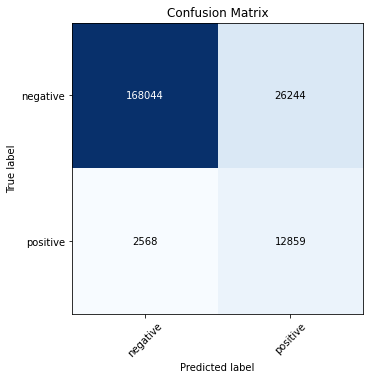

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#using y_test values and the predictions made from X_test
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap=plt.cm.Blues)

class_names = ['negative', 'positive']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

plt.show()

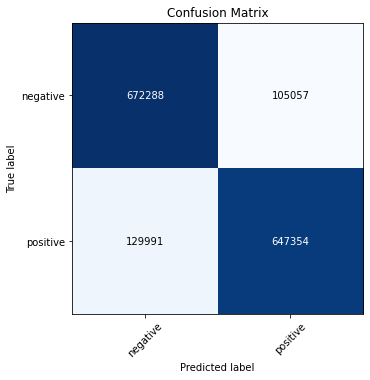

In [ ]:
#predictions using model made from  X training values (smote enhanced)
y_trainpred = model.predict(X_resampled)
#using y_resampled values and predictions from X_resampled
cm = confusion_matrix(y_resampled, y_trainpred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap=plt.cm.Blues)

class_names = ['negative', 'positive']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
df.columns

Index(['Death', 'AGE', 'kidney disease', 'SEX', 'PNEUMONIA', 'Diabetes',
       'COPD', 'Asthma', ' Immunodeficiency', 'HIPERTENSION', 'Heart disease',
       'OBESITY', 'Tobacco'],
      dtype='object')

KeyboardInterrupt: ignored

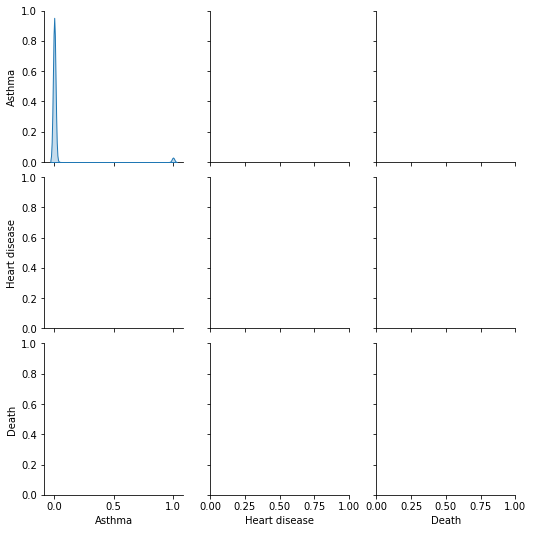

In [ ]:
#doesn't work IDK
import seaborn as sns
import matplotlib.pyplot as plt
df_pairplot = df[['Asthma','Heart disease','Death']]
sns.pairplot(df_pairplot, kind="kde")
plt.show()

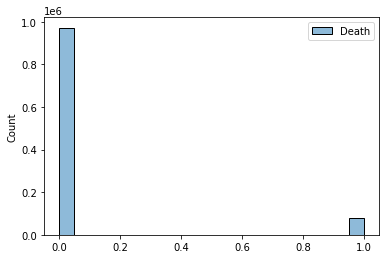

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Too little death
df_histogram = df[['Death']]
sns.histplot(df_histogram)
plt.show()

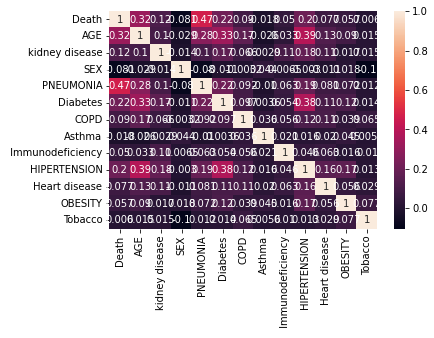

In [ ]:
df.corr()
sns.heatmap(df.corr(), annot=True)

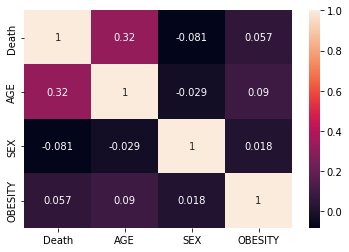

In [ ]:
df[['Death','AGE','SEX','OBESITY']].corr()
sns.heatmap(df[['Death','AGE','SEX','OBESITY']].corr(), annot=True)

In [ ]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['age_bins'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels)

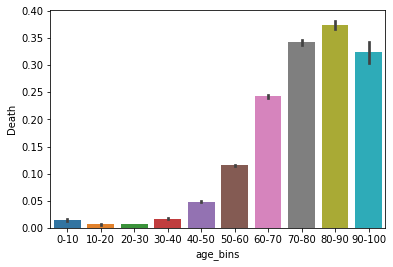

In [ ]:
sns.barplot(data=df, x='age_bins', y = 'Death')
plt.show()

In [ ]:
sns.barplot(x='age_bins', y='Death', data=df, estimator=lambda x: sum(x) / len(x))
plt.show()

KeyboardInterrupt: ignored

In [ ]:
sns.barplot(data=df, x='AGE', y = 'Death')
plt.show()

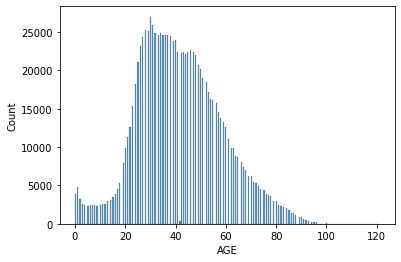

In [ ]:

df_histogram = df['AGE']
sns.histplot(df_histogram)
plt.show()

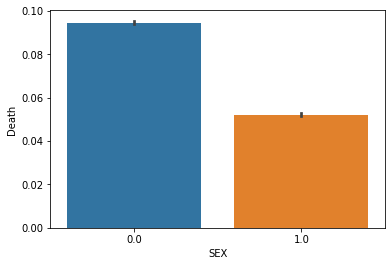

In [ ]:
sns.barplot(data=df, x='SEX', y ='Death')
plt.show()

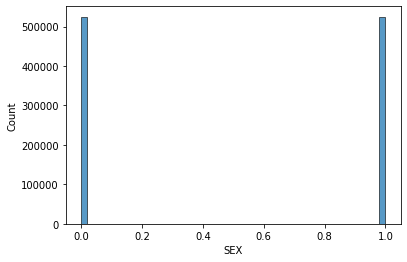

In [ ]:
df_histogram = df['SEX']
sns.histplot(df_histogram)
plt.show()

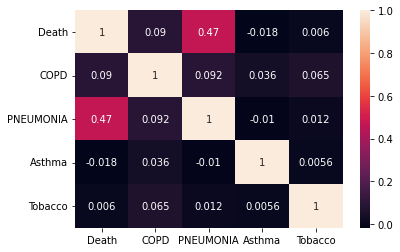

In [ ]:
df[['Death','COPD','PNEUMONIA','Asthma','Tobacco']].corr()
sns.heatmap(df[['Death','COPD','PNEUMONIA','Asthma','Tobacco']].corr(), annot=True)

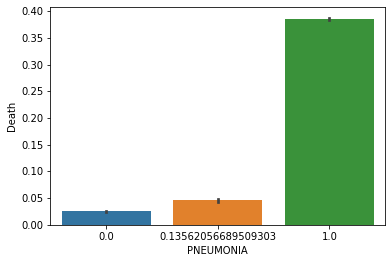

In [ ]:
sns.barplot(data=df, x='PNEUMONIA', y = 'Death')
plt.show()

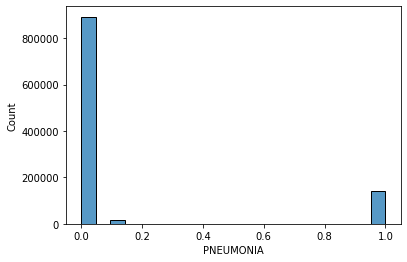

In [ ]:
df_histogram = df['PNEUMONIA']
sns.histplot(df_histogram)
plt.show()

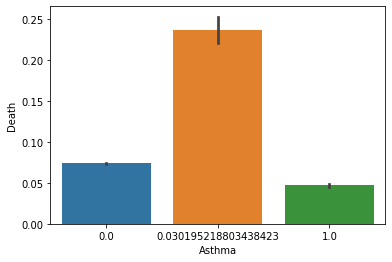

In [ ]:
#why is the mean value bar higher than the positive value bar
sns.barplot(data=df, x='Asthma', y ='Death')
plt.show()

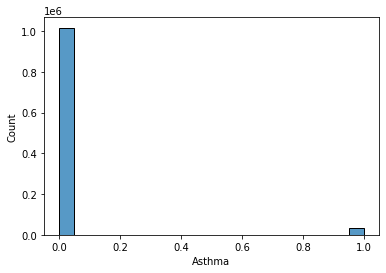

In [ ]:
#why is't mean value showing up or being counted
df_histogram = df['Asthma']
sns.histplot(df_histogram)
plt.show()

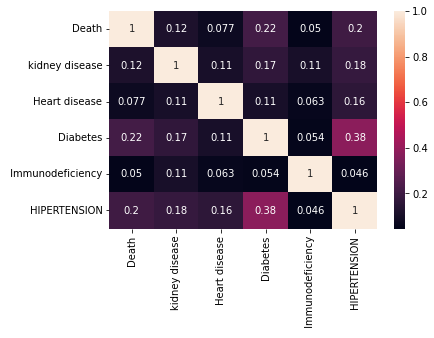

In [ ]:
df[['Death','kidney disease','Heart disease','Diabetes',' Immunodeficiency','HIPERTENSION']].corr()
sns.heatmap(df[['Death','kidney disease','Heart disease','Diabetes',' Immunodeficiency','HIPERTENSION']].corr(), annot=True)

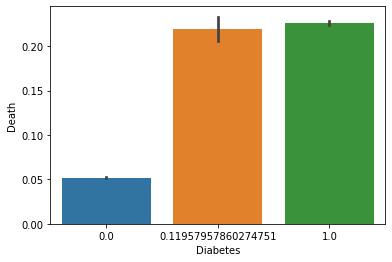

In [ ]:
sns.barplot(data=df, x='Diabetes', y ='Death')
plt.show()


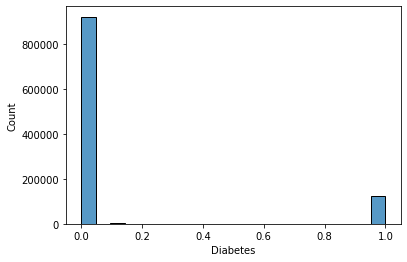

In [ ]:
df_histogram = df['Diabetes']
sns.histplot(df_histogram)
plt.show()

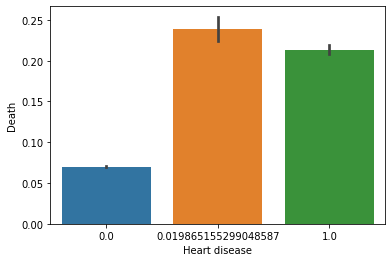

In [ ]:
#more people who died had more heart disease?
sns.barplot(data=df, x='Heart disease', y ='Death')
plt.show()

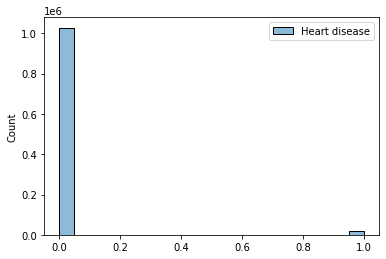

In [ ]:
df_histogram = df[['Heart disease']]
sns.histplot(df_histogram)
plt.show()

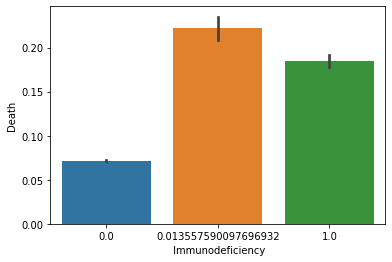

In [ ]:
sns.barplot(data=df, x=' Immunodeficiency', y ='Death')
plt.show()

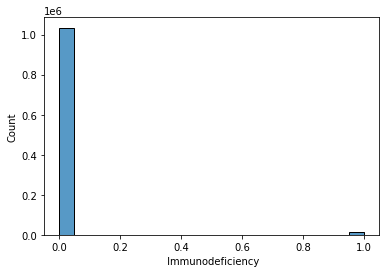

In [ ]:
df_histogram = df[' Immunodeficiency']
sns.histplot(df_histogram)
plt.show()

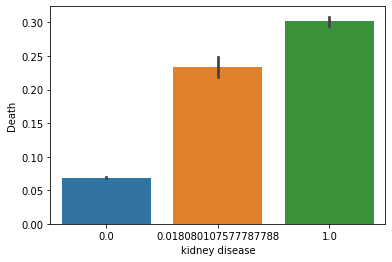

In [ ]:
#more people with kidney diabetes died
sns.barplot(data=df, x='kidney disease', y = 'Death')
plt.show()

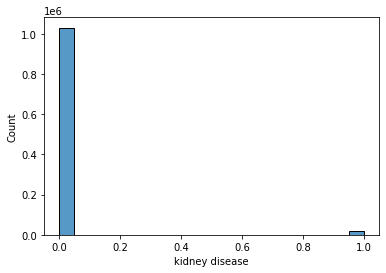

In [ ]:
#not a lot of kidney disease
df_histogram = df['kidney disease']
sns.histplot(df_histogram)
plt.show()

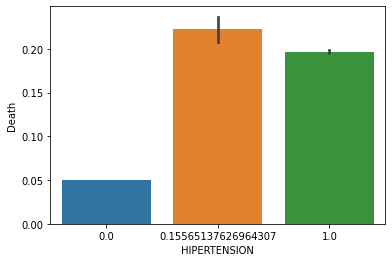

In [ ]:
sns.barplot(data=df, x='HIPERTENSION', y = 'Death')
plt.show()

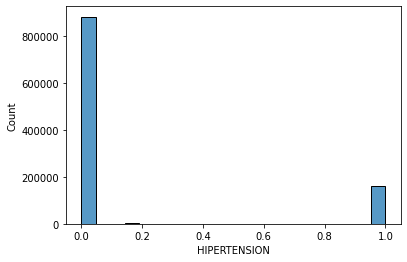

In [ ]:
df_histogram = df['HIPERTENSION']
sns.histplot(df_histogram)
plt.show()